# Prevendo transaçẽs fraudulentas
O objetivo desse notebook é criar um modelo de regressão logistica que consiga classificar trasançẽs fraudulentas

Os dados usados tem como fonte https://www.kaggle.com/datasets/vardhansiramdasu/fraudulent-transactions-prediction?resource=download&select=Fraud.csv

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

In [35]:
data = pd.read_csv('/home/gustavo/Downloads/Fraud.csv')
display(data.head())
data.shape

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


(6362620, 11)

In [36]:
# Para poder vizualizar melhor o modelo vamos apenas considerar 5% de todos os dados
n_rows = int(data.shape[0] * 0.05)
data = data.loc[:n_rows]

In [37]:
# Codificando variáveis categóricas
encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = encoder.fit_transform(data[col])

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,38135,170136.0,160296.36,88324,0.0,0.0,0,0
1,1,3,1864.28,109351,21249.0,19384.72,91874,0.0,0.0,0,0
2,1,4,181.00,50111,181.0,0.00,25204,0.0,0.0,1,0
3,1,1,181.00,291670,181.0,0.00,22391,21182.0,0.0,1,0
4,1,3,11668.14,171963,41554.0,29885.86,45704,0.0,0.0,0,0


In [38]:
# Separando as features e o alvo

target = data['isFraud']
features = data.drop(['isFraud'], axis=1)

In [39]:
# Reescalando as features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

scaled_features[0:5]

array([[0.00000000e+00, 7.50000000e-01, 9.83934030e-04, 1.19878785e-01,
        4.36924799e-03, 4.11583734e-03, 6.20832660e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.50000000e-01, 1.86398006e-04, 3.43748919e-01,
        5.45693742e-04, 4.97730294e-04, 6.45785741e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.80700005e-05, 1.57525785e-01,
        4.64824544e-06, 0.00000000e+00, 1.77159847e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.50000000e-01, 1.80700005e-05, 9.16875450e-01,
        4.64824544e-06, 0.00000000e+00, 1.57387166e-01, 5.12404419e-04,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.50000000e-01, 1.16678404e-03, 5.40572061e-01,
        1.06714470e-03, 7.67362019e-04, 3.21255105e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [40]:
# Dividindo os dados em treino e teste
features_train, features_test, target_train, target_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

In [41]:
# Criando o modelo
model = DecisionTreeClassifier()
model.fit(features_train, target_train);

In [42]:
# Avaliando o modelo

def evaluate_classifier(model, features, target):
    predictions = model.predict(features)
    accuracy = model.score(features, target)
    precision = precision_score(target, predictions)
    recall = recall_score(target, predictions)
    f1 = f1_score(target, predictions)
    conf_matrix = confusion_matrix(target, predictions)
    confusion_matrix_data_frame = pd.DataFrame(conf_matrix, index=['True', 'False'], columns=['Predicted True', 'Predicted False'])
    display(confusion_matrix_data_frame)
    print(f'Accuracy: {accuracy:.4}\nPrecision: {precision:.4}\nRecall: {recall:.4}\nF1: {f1:.4}')

evaluate_classifier(model, features_test, target_test)

,Predicted True,Predicted False
True,63573,14
False,21,19


Accuracy: 0.9994
Precision: 0.5758
Recall: 0.475
F1: 0.5205


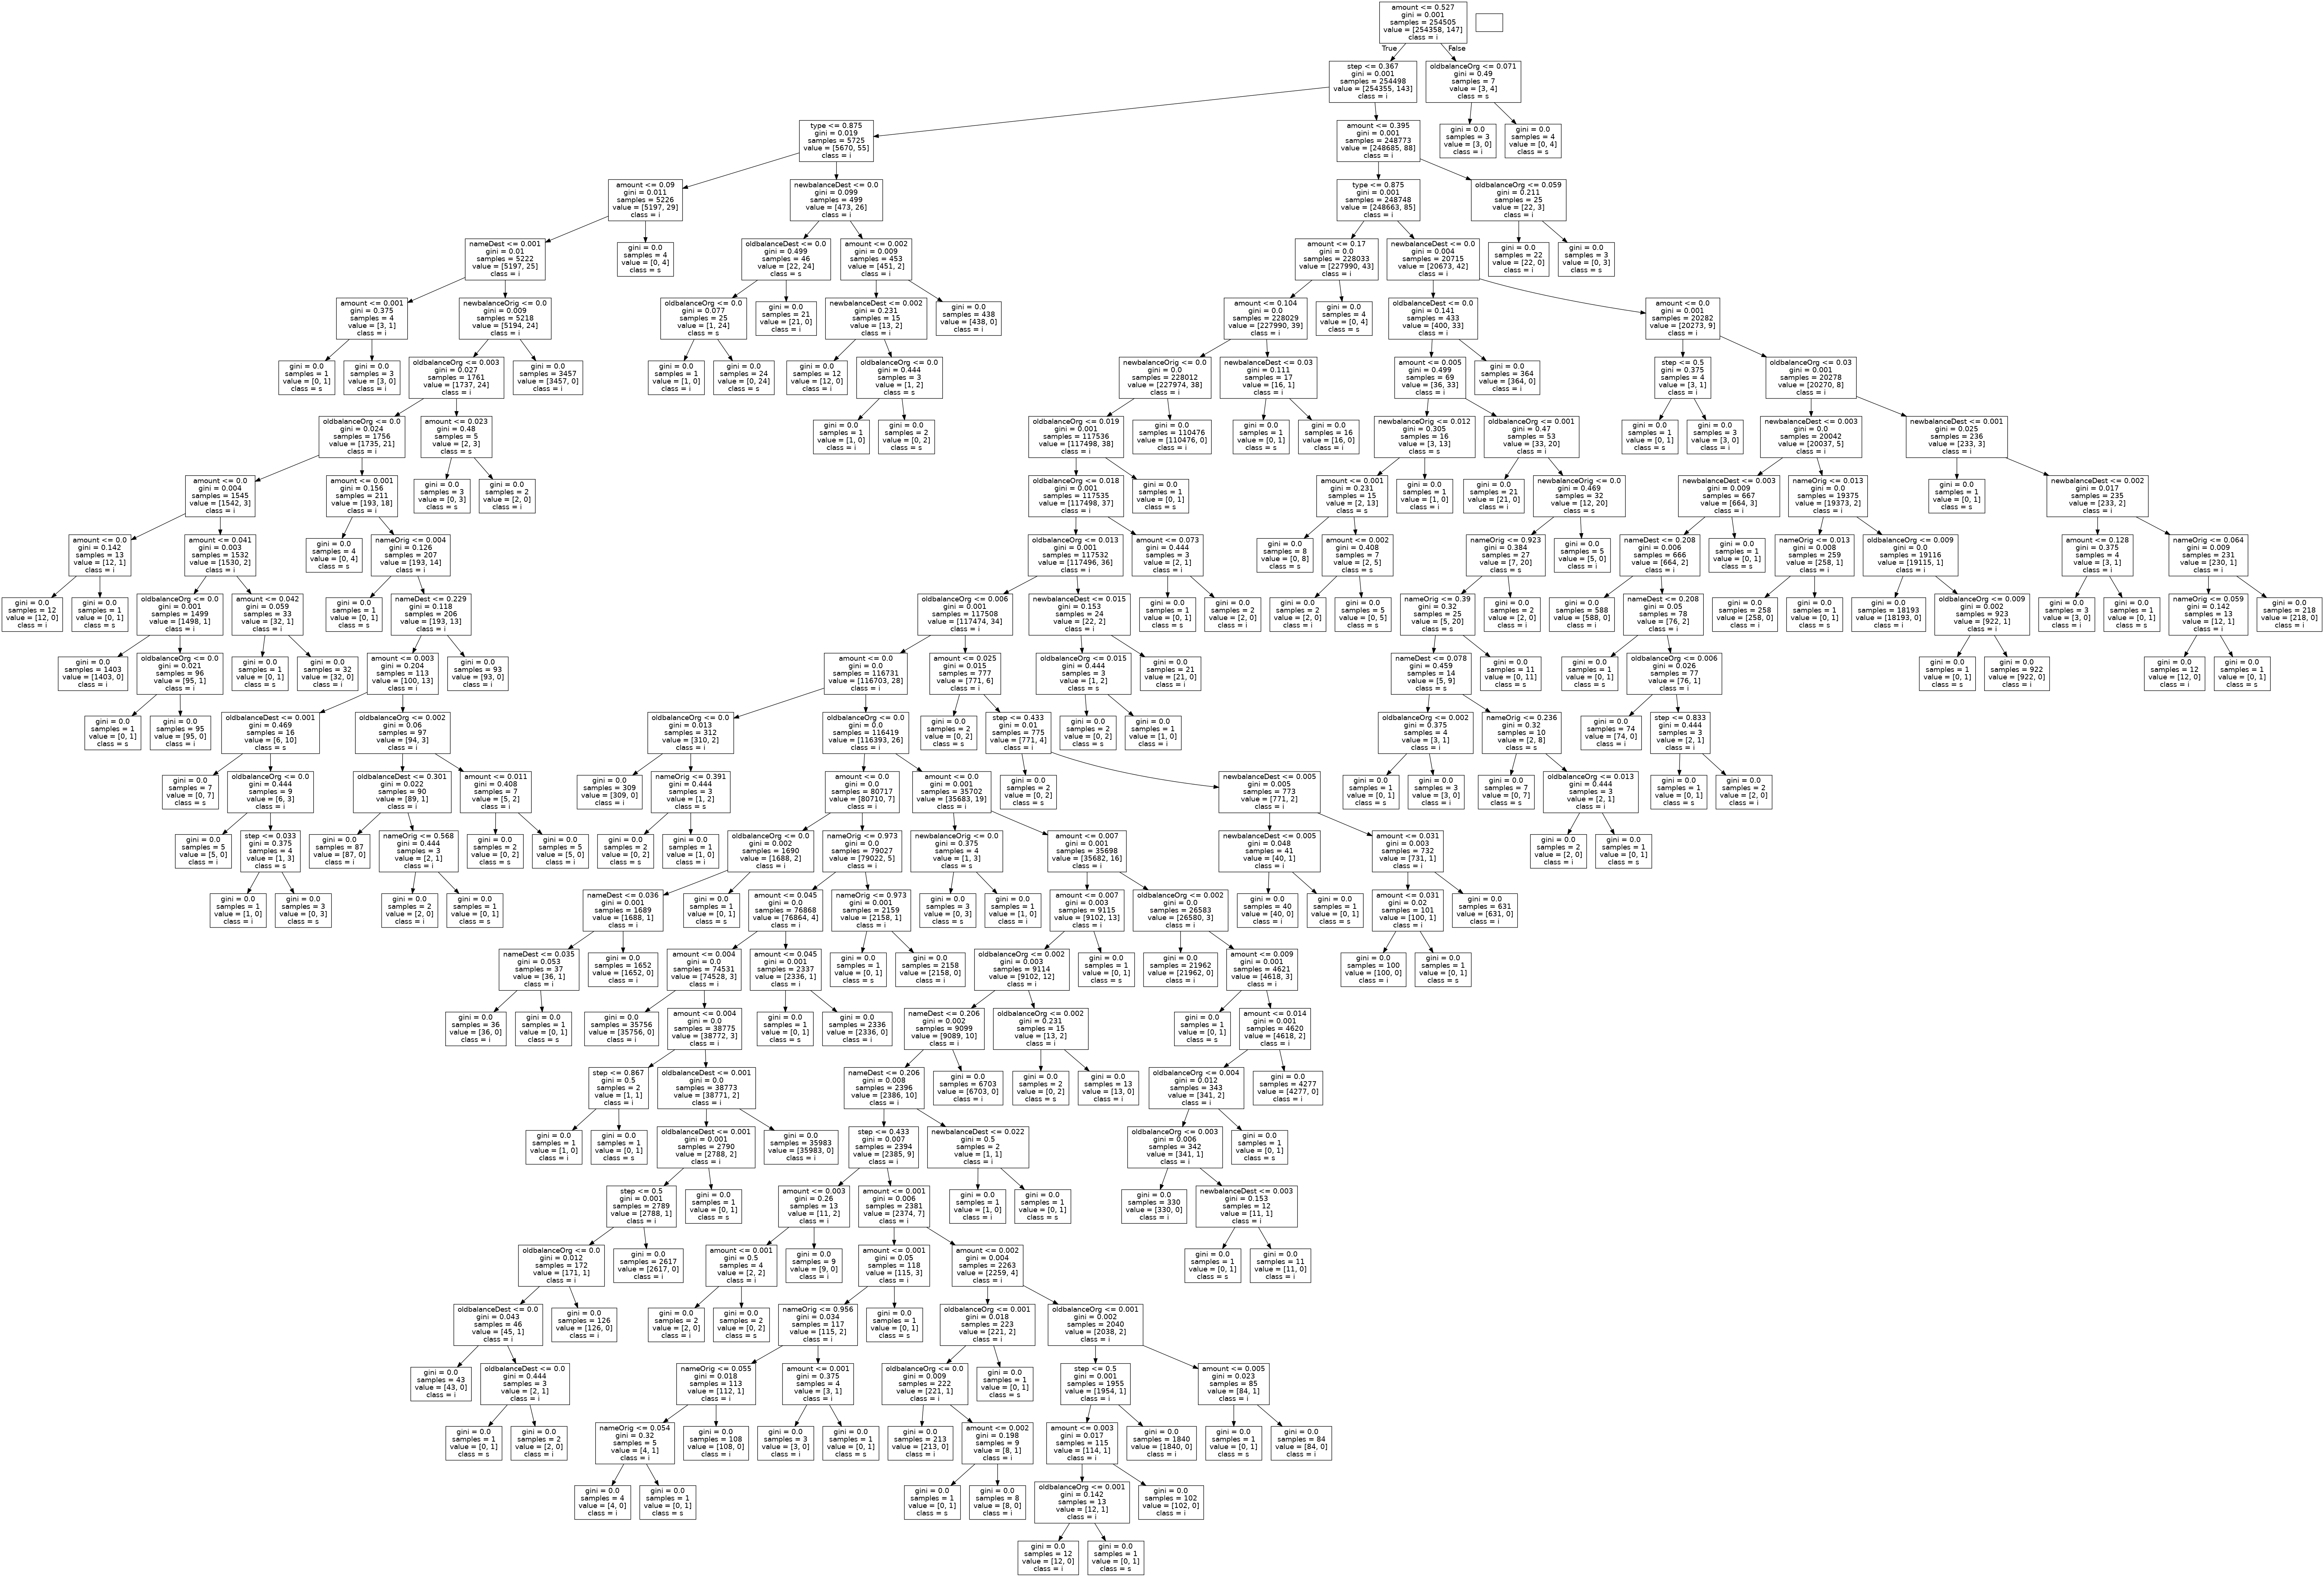

In [43]:
# Vizualizando o modelo
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=features.columns,
    class_names='isFraud'
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())